# PART 1 - SUMMARIZE DATAS

In [26]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def gini(data):
        """ Compute the Gini Coefficient. """

        l_data = np.sort(data)

        lorenz = np.cumsum(l_data) / l_data.sum()
        lorenz = np.append([0], lorenz)

        area_under_curve = lorenz[:-1].sum() / len(lorenz)
        S = 0.5 - area_under_curve
        gini = 2*S

        return gini

## Income by country

In [27]:
income_csv = pd.read_csv("Sources/WID_data.csv", decimal=",")
display(income_csv.shape)
display(income_csv.head(10))

(11599, 6)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0
5,ALB,2008,6,100,1171.14120,7297.0
6,ALB,2008,7,100,1201.13240,7297.0
7,ALB,2008,8,100,1240.89760,7297.0
8,ALB,2008,9,100,1285.69140,7297.0
9,ALB,2008,10,100,1325.25330,7297.0


In [49]:
main_df = income_csv.copy()
columns = {'year_survey': 'year'}
main_df.rename(columns=columns, inplace=True)
display(main_df.head(5))
display(main_df.country.unique())
display(len(main_df.country.unique()))
display(main_df.year.unique())

## World population

In [29]:
pop_df = pd.read_csv("Sources/FAO_data.csv")
display(pop_df.shape)
display(pop_df.head(5))
pop_df.Unité.unique()

(4430, 15)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


array(['1000 personnes'], dtype=object)

In [30]:
pop_df = pop_df[['Zone', 'Année', 'Valeur']].copy()

columns = {
    'Zone': 'country_full',
    'Année': 'year',
    'Valeur': 'population'
}
pop_df.rename(columns=columns, inplace=True)
pop_df.population = (pop_df.population * 1000).astype(int)
display(pop_df.head(10))

,country_full,year,population
0,Afghanistan,2000,20779953
1,Afghanistan,2001,21606988
2,Afghanistan,2002,22600770
3,Afghanistan,2003,23680871
4,Afghanistan,2004,24726684
5,Afghanistan,2005,25654277
6,Afghanistan,2006,26433049
7,Afghanistan,2007,27100536
8,Afghanistan,2008,27722276
9,Afghanistan,2009,28394813


## ISO 3 Country Name

In [31]:
iso_df = pd.read_csv("Sources/ISO3name_data.csv", header=None)
display(iso_df.head())

,0,1,2,3,4,5
0,1,4,AF,AFG,Afghanistan,Afghanistan
1,2,8,AL,ALB,Albanie,Albania
2,3,10,AQ,ATA,Antarctique,Antarctica
3,4,12,DZ,DZA,Algérie,Algeria
4,5,16,AS,ASM,Samoa Américaines,American Samoa


In [32]:
def rename_country(x):
    
    if (x == 'République Démocratique du Congo'):
        return 'République démocratique du Congo'
    
    elif (x == 'Bolivie'):
        return 'Bolivie (État plurinational de)'
    
    elif (x == 'République Centrafricaine'):
        return 'République centrafricaine'
    
    elif (x == 'République Tchèque'):
        return 'Tchéquie (la)'
    
    elif (x == 'République Dominicaine'):
        return 'République dominicaine'
    
    elif (x == 'République Islamique d\'Iran'):
        return 'Iran (République islamique d\')'
    
    elif (x == 'République Démocratique Populaire Lao'):
        return 'République démocratique populaire lao'

    elif (x == 'République Tchèque'):
        return 'Tchéquie'

    elif (x == 'Royaume-Uni'):
        return 'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord'
    
    elif (x == 'L\'ex-République Yougoslave de Macédoine'):
        return 'Macédoine du Nord'
    
    elif (x == 'Soudan'):
        return 'Soudan (ex)'
    
    elif (x == 'Swaziland'):
        return 'Eswatini'
    
    elif (x == 'Taïwan'):
        return 'Chine, Taiwan Province de'
    
    elif (x == 'États-Unis'):
        return 'États-Unis d\'Amérique'
    
    elif (x == 'Venezuela'):
        return 'Venezuela (République bolivarienne du)'
    
    elif (x == 'Territoire Palestinien Occupé'):
        return 'Palestine'
    
    elif (x == 'République Arabe Syrienne'):
        return 'République arabe syrienne'
    
    else:
        return x

iso_df = iso_df[[4,3]].copy()
iso_df.rename(columns={4:'country_full',3:'country'}, inplace=True)
iso_df.country_full = iso_df.country_full.apply(rename_country)
iso_df.head()

,country_full,country
0,Afghanistan,AFG
1,Albanie,ALB
2,Antarctique,ATA
3,Algérie,DZA
4,Samoa Américaines,ASM


In [33]:
data = {
    'country':['XKX', 'MNE', 'SRB'],
    'country_full':['Kosovo', 'Monténégro', 'Serbie']
}

data = pd.DataFrame(data)

iso_df = pd.concat([iso_df, data], sort=False).reset_index(drop=True)

## Merge data

In [34]:
main_df = main_df.merge(iso_df, how='left', on='country').copy()
main_df = main_df.merge(pop_df, how='left', on=['country_full', 'year'])
display(main_df.head())

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population
0,ALB,2008,1,100,728.89795,7297.0,Albanie,3002678.0
1,ALB,2008,2,100,916.66235,7297.0,Albanie,3002678.0
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,3002678.0
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,3002678.0
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,3002678.0


## Clean data
### Countries with no population

In [35]:
display(main_df[main_df.population.isna()].country.unique())

# Remove Kosovo
main_df = main_df[main_df.country != 'XKX'].copy()

# Remove Czech Republic
main_df = main_df[main_df.country != 'CZE'].copy()

array(['CZE', 'XKX'], dtype=object)

### Countries with no GDP (PPP)

In [36]:
display(main_df[main_df.gdpppp.isna()].country.unique())

# Remove Palestine
main_df = main_df[main_df.country != 'PSE'].copy()

array(['PSE'], dtype=object)

### Population to integer

In [37]:
# Population to int
main_df.population = main_df.population.astype(int)

### Clean Index

In [38]:
main_df.reset_index(drop=True, inplace=True)

main_df.head()

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population
0,ALB,2008,1,100,728.89795,7297.0,Albanie,3002678
1,ALB,2008,2,100,916.66235,7297.0,Albanie,3002678
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,3002678
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,3002678
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,3002678


___________________________________________________________
## Dataframe to summarize countries and population

### Population

In [39]:
# Our main_df population data
data_pop = (
    main_df[['country_full', 'year', 'population']]
        .drop_duplicates()
        .groupby('year')
        .sum()
)
data_pop.rename(columns={'population': 'data_pop'}, inplace=True)

data_pop.head(10)

,data_pop
year,
2004,17827825
2006,287547999
2007,2750266740
2008,2316203248
2009,471601789
2010,383832444
2011,14948801


In [40]:
# FAO's population data
fao_pop = pop_df.groupby('year').sum()
fao_pop.rename(columns={'population': 'fao_pop'}, inplace=True)

fao_pop = fao_pop.drop([2000,2001,2002,2003,2012,2013,2014,2015,2016,2017,2018])

fao_pop.head(20)

,fao_pop
year,
2004,7814030414
2005,7902641549
2006,7992046205
2007,8082212236
2008,8173074314
2009,8264492097
2010,8356326316
2011,8448774277


In [41]:
# Consolidation
overview = fao_pop.copy()
overview['data_pop'] = data_pop
overview['data_pop'] = overview['data_pop'].fillna(0).astype(int)

# Ratio
overview['ratio_pop'] = round(overview.data_pop / overview.fao_pop, 4)

overview

,fao_pop,data_pop,ratio_pop
year,,,
2004,7814030414,17827825,0.0023
2005,7902641549,0,0.0000
2006,7992046205,287547999,0.0360
2007,8082212236,2750266740,0.3403
2008,8173074314,2316203248,0.2834
2009,8264492097,471601789,0.0571
2010,8356326316,383832444,0.0459
2011,8448774277,14948801,0.0018


### Countries

In [42]:
# Our main_df countries data
data_countries = (
    main_df[['year', 'country_full']]
        .drop_duplicates()
        .groupby('year')
        .count()
)
data_countries.rename(columns={'country_full': 'data_countries'}, inplace=True)

data_countries

,data_countries
year,
2004,1
2006,5
2007,15
2008,74
2009,11
2010,6
2011,1


In [43]:
# FAO's countries data
fao_countries = pop_df[['year', 'country_full']].groupby('year').count()
fao_countries.rename(columns={'country_full': 'fao_countries'}, inplace=True)

fao_countries = fao_countries.drop([2000,2001,2002,2003,2012,2013,2014,2015,2016,2017,2018])

fao_countries

,fao_countries
year,
2004,230
2005,230
2006,231
2007,231
2008,231
2009,231
2010,231
2011,236


In [44]:
# Consolidation
overview['fao_countries'] = fao_countries
overview['data_countries'] = data_countries
overview['data_countries'] = overview['data_countries'].fillna(0).astype(int)

# Ratio
overview['ratio_countries'] = round(overview['data_countries'] / overview['fao_countries'], 4)

overview

,fao_pop,data_pop,ratio_pop,fao_countries,data_countries,ratio_countries
year,,,,,,
2004,7814030414,17827825,0.0023,230,1,0.0043
2005,7902641549,0,0.0000,230,0,0.0000
2006,7992046205,287547999,0.0360,231,5,0.0216
2007,8082212236,2750266740,0.3403,231,15,0.0649
2008,8173074314,2316203248,0.2834,231,74,0.3203
2009,8264492097,471601789,0.0571,231,11,0.0476
2010,8356326316,383832444,0.0459,231,6,0.0260
2011,8448774277,14948801,0.0018,236,1,0.0042


### Datas summarized

In [45]:
# Covering details
data_countries = overview.data_countries.sum()
fao_countries = overview.fao_countries.max()
data_pop = overview.data_pop.sum()
fao_pop = overview.fao_pop.max()

print(f"Length: {len(main_df):,} ({len(main_df) / len(income_csv):.2%})")
print(f"Countries: {overview.data_countries.sum()} ({data_countries / fao_countries:.2%})")
print(f"Population: {overview.data_pop.sum():,} ({data_pop / fao_pop:.2%})")

Length: 11,299 (97.41%)
Countries: 113 (47.88%)
Population: 6,242,228,846 (73.88%)


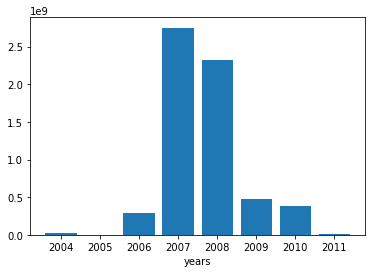

In [46]:
# Population by years
fig, ax = plt.subplots()
plt.bar(overview.index, overview['data_pop'])
plt.xlabel('years')
plt.show()

## Compute and merge Gini index

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini
0,ALB,2008,1,100,728.89795,7297.0,Albanie,3002678,0.32141
1,ALB,2008,2,100,916.66235,7297.0,Albanie,3002678,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,3002678,0.32141
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,3002678,0.32141
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,3002678,0.32141


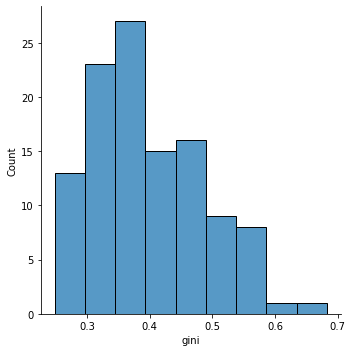

In [47]:
ginis = pd.DataFrame(columns=['country_full', 'gini'])

for country in main_df.country_full.unique():
    data = main_df[main_df.country_full == country]["income"].copy()
    Gini = gini(data)
    
    new_row = {
        'country_full': country,
        'gini': Gini
    }
    
    ginis = ginis.append(new_row, ignore_index=True)

main_df = main_df.merge(ginis, how='left', on='country_full')
display(main_df.head())

Ginis = main_df['gini'].drop_duplicates()
ax = sns.displot(Ginis)

# Conclusion
- Les années utilisées par la World Income Distribution vont de 2004 à 2011, avec une forte proportion de 2007 à 2008
- 113 pays sont présents dans l'étude (Environ 50% des pays recensés par la FAO)
- Environ 6 milliards de personnes sont couvertes par l'étude, soit environ 75% de la population mondiale recensée par la FAO
- Les quantiles utilisés par la World Income Distribution sont des percentiles, pour l'ensemble des pays
- L'utilisation des percentiles est une bonne méthode, car cela permet de considérablement réduire la taille de l'échantillon, tout en préservant suffisamment d'informations pour pouvoir l'analyser.
- Le dollar PPP est une unité qui permet de comparer le pouvoir d'achat entre deux pays sans distorsion due aux taux de change.

# Save Data

In [48]:
with open("data/main_df.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(main_df)
    
with open("data/overview.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(overview)